In [107]:
from keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

In [108]:
import numpy as np

def one_hot_encoding(x):
    tmp = np.zeros((len(x), 1, max(x)+1))
    for idx, data in enumerate(x):
        tmp[idx,0,data] = 1
    return tmp
    
x_train = x_train.reshape((len(x_train), 1, -1))
#y_train = one_hot_encoding(y_train)
x_test = x_test.reshape((len(x_test), 1, -1))
#y_test = one_hot_encoding(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 1, 784), (60000,), (10000, 1, 784), (10000,))

In [140]:
W = np.load('./final/W.npy')
b = np.load('./final/b.npy')
W, b

(array([[0.36364782, 0.92966706, 0.61706288, ..., 0.08309309, 0.64945343,
         0.1761269 ],
        [0.63641219, 0.87413775, 0.88345895, ..., 0.53235591, 0.89631847,
         0.74493472],
        [0.9498108 , 0.74180228, 0.02759672, ..., 0.06957412, 0.61821783,
         0.41864138],
        ...,
        [0.49792787, 0.23080267, 0.16803861, ..., 0.46850579, 0.75136925,
         0.29501988],
        [0.7780122 , 0.94050521, 0.61599685, ..., 0.91672839, 0.60100519,
         0.35529105],
        [0.28665031, 0.76347081, 0.9569655 , ..., 0.70067185, 0.32453877,
         0.37378893]]),
 array([[0.23408043, 0.74191411, 0.6111646 , 0.41323479, 0.57767849,
         0.33469095, 0.92517143, 0.19356942, 0.14858215, 0.22221436]]))

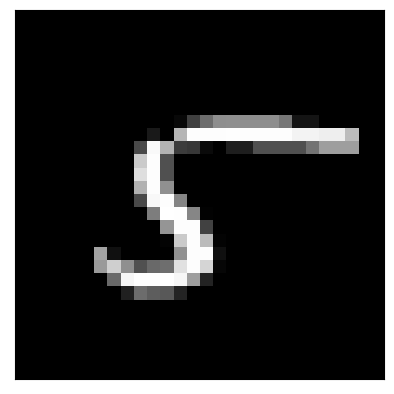

5
5 [[0.00000000e+000 3.88447276e-258 0.00000000e+000 0.00000000e+000
  0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000
  1.08276048e-254 0.00000000e+000]]


In [141]:
import cv2
from matplotlib import pyplot as plt

idx = 8823

def softmax(x):
    c = np.max(x)
    np_exp = np.exp(x - c)
    return np_exp / np.sum(np_exp)

plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
plt.xticks([]) # x축 눈금
plt.yticks([]) # y축 눈금
plt.show()
print(y_test[idx])

y_pred = x_test[idx] @ W + b
print(np.argmax(softmax(y_pred)), softmax(y_pred))

In [142]:
sum([np.argmax(softmax(x_train[idx] @ W + b)) == y_train[idx] for idx in range(len(x_train))])/len(x_train)

0.7435166666666667

In [143]:
sum([np.argmax(softmax(x_test[idx] @ W + b)) == y_test[idx] for idx in range(len(x_test))])/len(x_test)

0.749